In [1]:
#Importando as bibliotecas e formatando saida de valores com 2 casas decimais
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")
pd.options.display.float_format='{:20,.2f}'.format  

In [3]:
#Criando o DataFrame do Catalogo Cartier
#Fonte Dataset -> https://www.kaggle.com/marcelopesse/cartier-jewelry-catalog
df = pd.read_csv("/content/cartier_catalog.csv")

In [4]:
#Visualizando as primeiras linhas
df.head()

,ref,categorie,title,price,tags,description,image
0,B4084600,rings,Love ring,"1,650.00",yellow gold,"Love ring, 18K yellow gold. Width: 5.5mm.",/content/dam/rcq/car/58/71/74/587174.png
1,B4084900,rings,Love ring,"3,650.00",platinum,"Love ring, 950/1000 platinum. Width: 5.5mm.",/content/dam/rcq/car/19/43/98/1/1943981.png
2,B4084800,rings,Love ring,"1,650.00",pink gold,"Love ring, 18K rose gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/64/0/1028640.png
3,B4084700,rings,Love ring,"1,770.00",white gold,"Love ring, 18K white gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/63/6/1028636.png
4,B4085000,rings,Love wedding band,"1,070.00",yellow gold,"Love wedding band, 18K yellow gold. Width: 3.6mm.",/content/dam/rcq/car/59/18/04/591804.png


In [5]:
#Renomenado colunas e apagando uma coluna desnecessaria
df.drop(columns="image", inplace=True)
df.rename(columns={"categorie":"categoria", "title":"titulo", "price":"preco","description":"descricao"}, inplace=True)

In [6]:
#Visualizando e confirmando alterações
df.head()

,ref,categoria,titulo,preco,tags,descricao
0,B4084600,rings,Love ring,"1,650.00",yellow gold,"Love ring, 18K yellow gold. Width: 5.5mm."
1,B4084900,rings,Love ring,"3,650.00",platinum,"Love ring, 950/1000 platinum. Width: 5.5mm."
2,B4084800,rings,Love ring,"1,650.00",pink gold,"Love ring, 18K rose gold. Width: 5.5mm."
3,B4084700,rings,Love ring,"1,770.00",white gold,"Love ring, 18K white gold. Width: 5.5mm."
4,B4085000,rings,Love wedding band,"1,070.00",yellow gold,"Love wedding band, 18K yellow gold. Width: 3.6mm."


In [7]:
#Checando existencia de dados nulos
df.isnull().sum()

ref          0
categoria    0
titulo       0
preco        0
tags         0
descricao    0
dtype: int64

In [8]:
#Estatistica rápida
df.describe()

,preco
count,692.00
mean,"27,057.17"
std,"54,549.44"
min,500.00
25%,"2,620.00"
50%,"6,800.00"
75%,"22,225.00"
max,"370,000.00"


In [9]:
#Estatistica por categoria
df.groupby("categoria").describe()

preco  ...                     
                         count  ...                  max
categoria                       ...                     
bracelets               160.00  ...           331,000.00
earrings                118.00  ...           251,000.00
necklaces               155.00  ...           370,000.00
rings                   259.00  ...           217,000.00

[4 rows x 8 columns]

In [10]:
#Os maiores preços
df.nlargest(5,"preco")

,ref,categoria,titulo,preco,tags,descricao
533,H7000130,necklaces,Reflection de Cartier necklace,"370,000.00","white gold, diamonds","Reflection de Cartier necklace, 18K white gold..."
459,H7000156,necklaces,Cactus de Cartier Necklace,"342,000.00","yellow gold, emeralds, diamonds","Cactus de Cartier necklace, 18K yellow gold, e..."
390,H6004717,bracelets,Juste un Clou bracelet,"331,000.00","white gold, diamonds","Juste un Clou cuff bracelet, 18K white gold, s..."
490,HP701146,necklaces,Faune et Flore de Cartier necklace,"331,000.00","platinum, emeralds, diamonds","Necklace - platinum, emeralds, one 0.13-carat ..."
389,HP601192,bracelets,Juste un Clou bracelet,"312,000.00","white gold, diamonds","Bracelet - 18K white gold, 1,752 brilliant-cut..."


In [11]:
#Os menores preços
df.nsmallest(5,"preco")

,ref,categoria,titulo,preco,tags,descricao
579,B8301421,earrings,Love single earring,500.00,yellow gold,"Love single earring, 18K yellow gold. Diameter..."
542,B7060700,necklaces,Chain necklace,570.00,yellow gold,"Chain necklace, 18K yellow gold."
550,B3153111,necklaces,Cross pendant,570.00,yellow gold,"Cross pendant, 18K yellow gold"
551,B3153112,necklaces,Star pendant,570.00,yellow gold,"Star pendant, 18K yellow gold"
552,B3153113,necklaces,Hand of Fatima pendant,570.00,yellow gold,"Hand of Fatima pendant, 18K yellow gold"


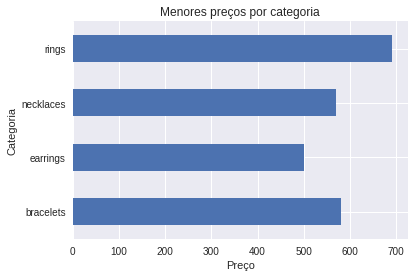

In [12]:
#Grafico de menores preços por categoria
df.groupby("categoria")["preco"].min().plot.barh(title="Menores preços por categoria")
plt.ylabel("Categoria")
plt.xlabel("Preço");


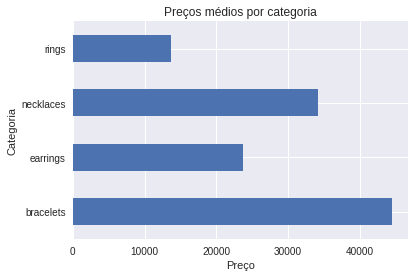

In [13]:
#Grafico de preços médios por categoria
df.groupby("categoria")["preco"].mean().plot.barh(title="Preços médios por categoria")
plt.ylabel("Categoria")
plt.xlabel("Preço");

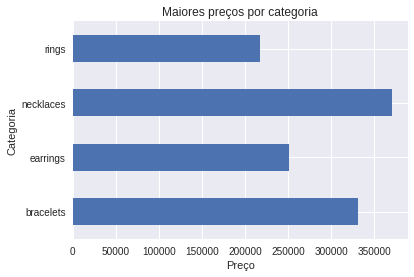

In [14]:
#Grafico de maiores preços por categoria
df.groupby("categoria")["preco"].max().plot.barh(title="Maiores preços por categoria")
plt.ylabel("Categoria")
plt.xlabel("Preço");

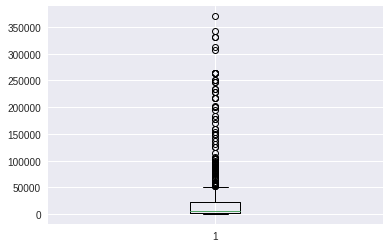

In [15]:
#Grafico
plt.boxplot(df["preco"]);

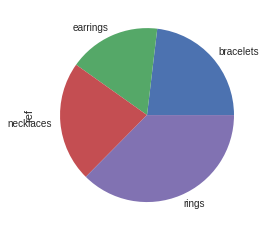

In [16]:
#Grafico da quantidade de produtos ofertados por categoria
df.groupby(df["categoria"])["ref"].count().plot.pie()

Explorando os dados desse catálogo de jóias, observamos **692 produtos** de **4 categorias**.


*   os ***rings*** tem a melhor média de preços e a maior 
quantidade de produtos sendo ofertados no catálogo (259).
*   os ***earings*** tem o um produto de preço 500, que é o menor preço dentro de todos os produtos e categorias.
*   os ***necklaces*** tem o produto de maior preço 370000
*   os ***bracelets*** tem a maior média de preços.

Observamos uma serie de produtos outliers que influenciaram na calculo da média, conforme ilustra o grafico de BoxPlot. Destacamos a mediana de preços de 6800.

Dos 5 produtos com menores valores, todos são da tag "yellow gold". E dos 5 produtos com maiores valores todos tem em sua tag "diamonds".